<a href="https://colab.research.google.com/github/tomasiamussuri/API_IBGE_NascidosObitos/blob/main/Dados_IBGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [18]:
import urllib3
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importando dados da API pública do IBGE

In [19]:
http = urllib3.PoolManager()
urlPoralApiIBGE = "http://servicodados.ibge.gov.br/api/v1/projecoes/populacao"
response = http.request('GET', urlPoralApiIBGE)
print("Response Status: ",response.status)

Response Status:  200


In [21]:
data_response = response.data.decode("utf-8")
data_response  

'{"localidade":"0","horario":"31/10/2022 17:00:48","projecao":{"populacao":215292853,"periodoMedio":{"incrementoPopulacional":21355,"nascimento":12000,"obito":45000}}}'

In [22]:
data_json = json.loads(data_response)
print(data_json)

{'localidade': '0', 'horario': '31/10/2022 17:00:48', 'projecao': {'populacao': 215292853, 'periodoMedio': {'incrementoPopulacional': 21355, 'nascimento': 12000, 'obito': 45000}}}


In [23]:
data_json

{'localidade': '0',
 'horario': '31/10/2022 17:00:48',
 'projecao': {'populacao': 215292853,
  'periodoMedio': {'incrementoPopulacional': 21355,
   'nascimento': 12000,
   'obito': 45000}}}

In [24]:
print(data_json["horario"])

31/10/2022 17:00:48


In [25]:
print(data_json["projecao"]["periodoMedio"])

{'incrementoPopulacional': 21355, 'nascimento': 12000, 'obito': 45000}


Armazenando os dados em uma variável

In [28]:
data_grafico = data_json["projecao"]["periodoMedio"]
data_grafico

{'incrementoPopulacional': 21355, 'nascimento': 12000, 'obito': 45000}

In [29]:
totalNascimento = data_grafico["nascimento"]
totalObito = data_grafico["obito"]
dataAtualizacao = data_json["horario"]
print(totalNascimento)
print(totalObito)
print(dataAtualizacao)

12000
45000
31/10/2022 17:00:48


AttributeError: ignored

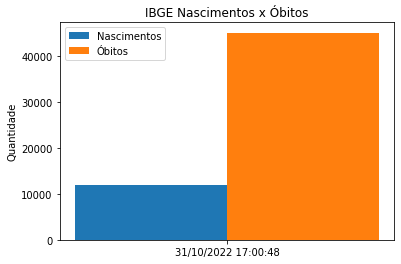

In [35]:
labels = [dataAtualizacao]
dataNascimento = [totalNascimento]
dataObito = [totalObito]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dataNascimento, width, label='Nascimentos')
rects2 = ax.bar(x + width/2, dataObito, width, label='Óbitos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('IBGE Nascimentos x Óbitos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()